<div style="text-align: center; font-size: 36px; font-weight: bold;">
    Amazon Customer Data Analysis
</div>

In [3]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

The column or features in the dataset:
    
    Id
    ProductId — unique identifier for the product
    UserId — unqiue identifier for the user
    ProfileName
    HelpfulnessNumerator — number of users who found the review helpful
    HelpfulnessDenominator — number of users who indicated whether they found the review helpful or not
    Score — rating between 1 and 5
    Time — timestamp for the review
    Summary — brief summary of the review
    Text — text of the review

# Reading data from Sqlite database.

In [4]:
import sqlite3

In [5]:
# Create a SQL connection to our SQLite database
engine = sqlite3.connect(r'database.sqlite')

In [6]:
df = pd.read_sql_query("Select * from Reviews;",con=engine )
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
# Checking the dimensions of the dataframe.
df.shape

(568454, 10)

# Data Preperation

In [8]:
# HelfulnessNumerator is always less than or equal to HelpfulnesDenominator. So, filter out the invalid rows.
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']  ## invalid row

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [9]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']] # invalid rows in Dataframe

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [10]:
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [11]:
# Check for duplicate rows.
'''Checking duplicates based on UserId, ProfileName, Time, Text as No user can type a review on same exact time for 
different products, so we will remove those records'''
df.duplicated(['UserId','ProfileName','Time','Text']) 

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [12]:
df[df.duplicated(['UserId','ProfileName','Time','Text'])] 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


##### Approx 174521 are duplicated .. so u have to remove these duplicate rows.

In [13]:
df = df.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [14]:
df.shape

(393931, 10)

In [15]:
# Checking the datatypes of the features.
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [16]:
# Convert time feature data-type from int64 to date-time.
df['Time'] = pd.to_datetime(df['Time'],unit='s')

In [17]:
df.dtypes

Id                                 int64
ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                      datetime64[ns]
Summary                           object
Text                              object
dtype: object

# Analyse to what User Amazon Can recommend more product? 

##### Amazon can recommend more products to only those who are going to buy more or to one who has a better conversion rate,so lets ready data according to this problem statement

In [18]:
recommend_df = df.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Summary',ascending=False)
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [19]:
recommend_df.columns = ['Number_of_summaries','num_text','avg_score','No_of_prods_purchased']
recommend_df

,Number_of_summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [20]:
# Find out top 10 users!
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [21]:
recommend_df['No_of_prods_purchased'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118])

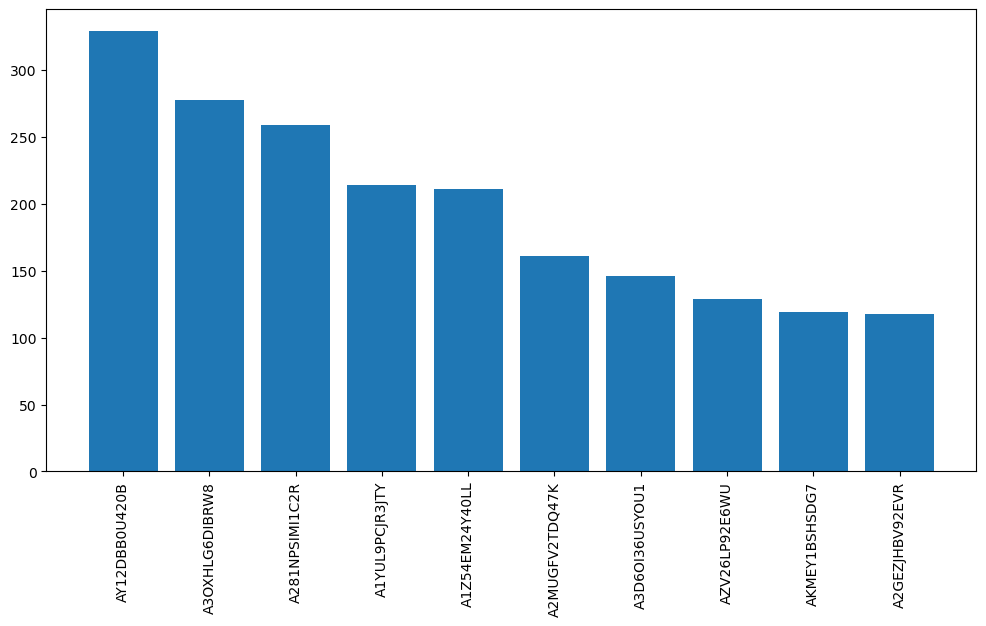

In [22]:
plt.figure(figsize=(12,6))
plt.bar(recommend_df.index[0:10],recommend_df['No_of_prods_purchased'][0:10].values)
plt.xticks(rotation='vertical')
plt.show()

##### Conclusion: These are the Top 10 Users so we can recommend more & more Products to these User Id as there will be a high probability that these person are going to be buy more

# Analysing which product has good number of reviews?

In [23]:
df['ProductId'].nunique()
## We can see that there are 67624 types of products in the dataset.

67624

In [ ]:
### Among 67624 products , lets pick most sold product for Analysis 
### We will consider that product as most sold product which must be sold atleast 600 times..

In [24]:
prod_count = df['ProductId'].value_counts().to_frame()
prod_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1


In [25]:
prod_count['count']>500

ProductId
B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B002DNX4GO    False
B000FM2YU2    False
B001M1VA32    False
B009858H6M    False
B001LR2CU2    False
Name: count, Length: 67624, dtype: bool

In [26]:
freq_prod_ids = prod_count[prod_count['count']>500].index
freq_prod_ids ## most sold products

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [27]:
# Lets separate dataframe of most sold products only!
freq_prod_df = df[df['ProductId'].isin(freq_prod_ids)]
freq_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


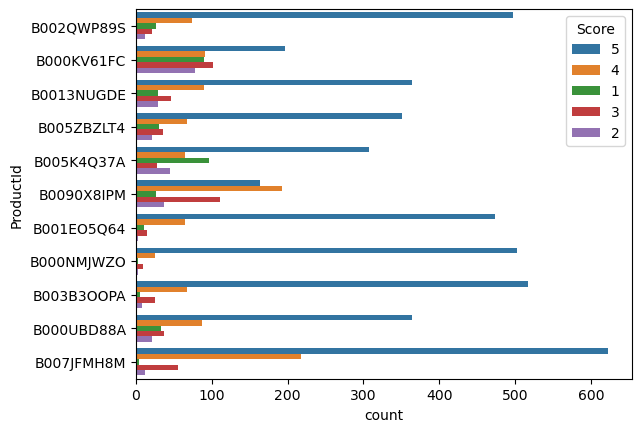

In [42]:
freq_prod_df['Score'] = freq_prod_df['Score'].astype(str)
sns.countplot(y='ProductId',data=freq_prod_df,hue='Score')
plt.show()

In [43]:
freq_prod_df['Score'] = freq_prod_df['Score'].astype(int)

# Understanding Behaviours of Amazon Users

# Is there any difference between behaviour of frequent viewers & not frequent viewers? 

In [45]:
'''First lets understand who are frequent viewers & who are not frequent viewers.

Frequent viewers are those who have bought products atleast 50 times or more.
Non-Frequent viewers are those who have bought products less than 50 times.'''
x = df['UserId'].value_counts()
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [46]:
df['Viewer_type'] = df['UserId'].apply(lambda user: 'Frequent' if x[user]>50 else 'Not Frequent')
df['Viewer_type']

0         Not Frequent
1         Not Frequent
2         Not Frequent
3         Not Frequent
4         Not Frequent
              ...     
568449    Not Frequent
568450    Not Frequent
568451    Not Frequent
568452    Not Frequent
568453    Not Frequent
Name: Viewer_type, Length: 393931, dtype: object

In [48]:
## Lets separate dataframe for both "frequent_viewers" & for "not_frequent_viewers".
not_freq_df = df[df['Viewer_type']=='Not Frequent']
freq_df = df[df['Viewer_type']=='Frequent']

In [49]:
freq_df['Score'].value_counts()

Score
5    5765
4    1979
3     897
2     368
1     349
Name: count, dtype: int64

In [52]:
freq_df['Score'].value_counts()/len(freq_df)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

<Axes: xlabel='Score'>

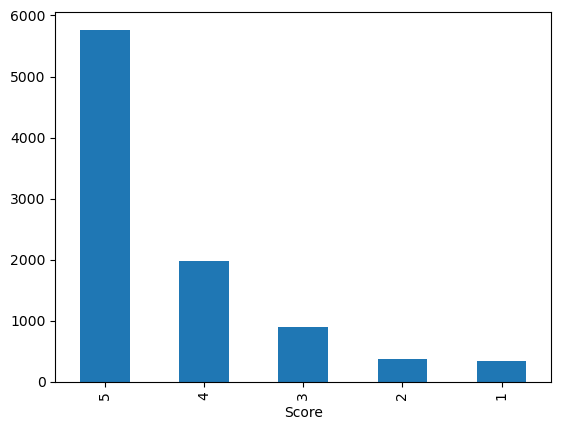

In [51]:
freq_df['Score'].value_counts().plot(kind='bar')

In [53]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

Score
5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: count, dtype: float64

<Axes: xlabel='Score'>

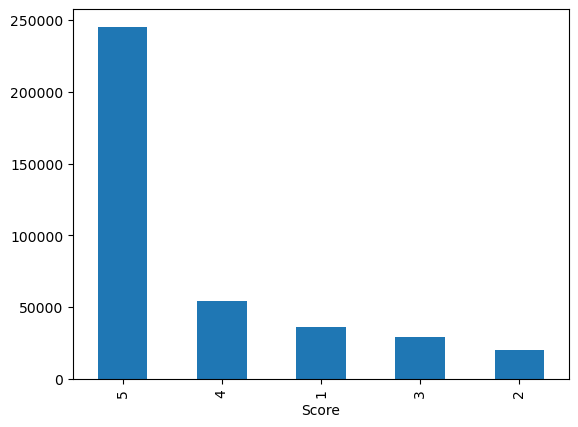

In [54]:
not_freq_df['Score'].value_counts().plot(kind='bar')

The distribution of ratings among frequent reviewers is similar to that of all reviews.
However, we can see that frequent reviewers give less 5-star reviews and less 1-star review.
Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews.


# Perform Sentiment Analysis

In [56]:
import textblob
from textblob import TextBlob

In [57]:
polarity = []
for text in df['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [58]:
len(polarity)

393931

In [59]:
df['polarity'] = polarity

In [60]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_type,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,0.8


In [62]:
df_negative = df[df['polarity']<0]
df_positive = df[df['polarity']>0]

In [64]:
from collections import Counter

In [66]:
Counter(df_negative['Summary']).most_common(10)

[('Disappointed', 426),
 ('Disappointing', 223),
 ('Not what I expected', 143),
 ('Awful', 120),
 ('disappointed', 120),
 ('Horrible', 111),
 ('Terrible', 107),
 ('Disgusting', 89),
 ('Not good', 78),
 ('Bland', 64)]

In [67]:
Counter(df_positive['Summary']).most_common(10)

[('Delicious!', 1768),
 ('Delicious', 1682),
 ('Great product', 765),
 ('Excellent', 713),
 ('Love it!', 649),
 ('Great Product', 648),
 ('Great!', 529),
 ('Great', 506),
 ('Awesome', 396),
 ('Awesome!', 394)]